## Step Recipe Dataset - EDA

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

### Data Loading
Analyzing metadata from the step recipe image dataset. Each image has associated keywords used in Photoshop post-production pipelines.

In [2]:

# Load data
data = pd.read_csv('metadata.csv')

data["Keywords"] = data["Keywords"].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

all_keywords = data.explode("Keywords")

### Keyword Distribution
Examining the frequency and distribution of keywords the dataset to:
- Identify most common keywords
- Find data imbalances
- Validate keyword consistency

In [6]:
# Keyword frequency
print(all_keywords["Keywords"].value_counts())
print("="*10)
print(all_keywords["Keywords"].apply(type)) # Data types

Keywords
['finalstep' 'steplibrary']                               729
['steplibrary' 'pan']                                     717
['steplibrary' 'finalstep']                               716
['main']                                                  597
['pan' 'steplibrary']                                     350
                                                         ... 
['oven-tray' 'main' 'steplibrary']                          1
['glass-bowl-large' 'glass-bowl-medium' 'steplibrary']      1
['steplibrary' 'onWhite' 'finalstep' 'group_step']          1
['steplibrary' 'finalstep' 'glass-bowl-large']              1
['steplibrary' 'chopping-board' 'onWhite' 'medium']         1
Name: count, Length: 136, dtype: int64
0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
6664    <class 'str'>
6665    <class 'str'>
6666    <class 'str'>
6667    <class 'str'>
6668    <class 'str'>
Name: Keywords, Length: 6669

In [7]:
# Extract keywords with Counter
keywords_counter = Counter()
for keywords_list in all_keywords["Keywords"]:
    if isinstance(keywords_list, str):
        keywords = re.findall(r"[\w-]+", keywords_list)
        keywords_counter.update(keywords)

In [8]:
# Extract unique keywords
unique_keywords = set()
for keywords_list in all_keywords["Keywords"]:
    if isinstance(keywords_list, list):
        unique_keywords.update(keywords_list)
    elif isinstance(keywords_list, str):
        keywords = re.findall(r"[\w-]+", keywords_list)
        unique_keywords.update(keywords)

In [9]:
# Count number of unique keywords (by using the keyword counter)
unique_keywords_set = set(keywords_counter.keys())
unique_keywords = len(unique_keywords_set)
print("Unique keywords set:", unique_keywords_set)
print("Number of unique keywords:", unique_keywords)

Unique keywords set: {'medium', 'glass-bowl-medium', 'grill-plate', 'glass-bowl-small', 'onWhite', 'oven-tray', 'pot-two-handles-small', 'finalstep', 'purple', 'CP', 'pot-two-handles-shallow', 'saucepan', 'chopping-board', 'glass-bowl-large', 'truffle', 'pot-one-handle', 'group_step', 'main', 'pan', 'oven-dish', 'pot-two-handles-medium', 'steplibrary', 'sauce-pan'}
Number of unique keywords: 23


In [10]:
# Count number of samples per keyword
samples_per_keyword = pd.Series(keywords_counter).sort_values(ascending=False)
print("Total number of samples per keyword:", samples_per_keyword)

Total number of samples per keyword: steplibrary                6072
finalstep                  1631
pan                        1254
chopping-board              727
onWhite                     717
main                        623
oven-tray                   613
group_step                  607
glass-bowl-large            386
medium                      279
glass-bowl-medium           226
pot-two-handles-medium      155
oven-dish                   143
pot-one-handle              138
CP                          118
pot-two-handles-shallow      91
glass-bowl-small             64
pot-two-handles-small        23
saucepan                     21
sauce-pan                    21
grill-plate                   3
purple                        1
truffle                       1
dtype: int64


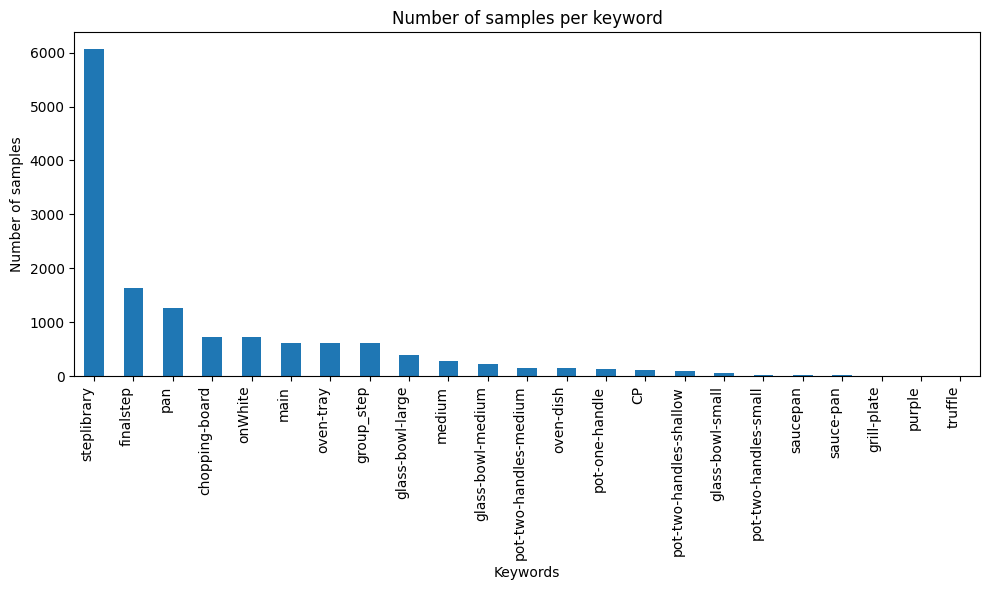

In [11]:
# Plot histogram to see distribution of samples per keyword
plt.figure(figsize=(10, 6))
samples_per_keyword.plot(kind='bar')
plt.xlabel("Keywords")
plt.ylabel("Number of samples")
plt.title("Number of samples per keyword")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

### Keyword Cleanup and Standardization
Removing non-relevant keywords and standardizing naming:
- Removed utility tags (steplibrary, finalstep, etc.)
- Unify similar keywords (e.g., sauce-pan → saucepan)
- Group related categories

In [12]:
## Removing some keywords
keywords_to_remove = ["steplibrary", "finalstep", "onWhite", "main", "purple", "truffle"]
# onWhite -> yes
# finalstep -> pot handle medium
# medium -> chopping-board-medium
for keyword in keywords_to_remove:
    samples_per_keyword.pop(keyword)
    
# Recount number of unique keywords and samples per keyword
unique_keywords_set = set(samples_per_keyword.index)
unique_keywords = len(unique_keywords_set)
print("Updated unique keywords set:", unique_keywords_set)
print("Updated number of unique keywords:", unique_keywords)

Updated unique keywords set: {'medium', 'sauce-pan', 'glass-bowl-medium', 'oven-dish', 'pot-one-handle', 'pot-two-handles-shallow', 'grill-plate', 'pot-two-handles-medium', 'saucepan', 'chopping-board', 'glass-bowl-small', 'group_step', 'oven-tray', 'pan', 'pot-two-handles-small', 'glass-bowl-large', 'CP'}
Updated number of unique keywords: 17


In [13]:
# Define a keyword mapping to group similar keywords
keyword_mapping = {
    "sauce-pan": "saucepan",
}

# Apply keyword mapping to unify similar keywords
def map_keyword(keyword, mapping):
    while keyword in mapping:
        keyword = mapping[keyword]
    return keyword

samples_per_keyword = samples_per_keyword.rename(lambda x: map_keyword(x, keyword_mapping))

# Recount number of unique keywords and samples per keyword
unique_keywords_set = set(samples_per_keyword.index)
unique_keywords = len(unique_keywords_set)
print("Updated unique keywords set:", unique_keywords_set)
print("Updated number of unique keywords:", unique_keywords)

Updated unique keywords set: {'medium', 'glass-bowl-medium', 'oven-dish', 'pot-one-handle', 'pot-two-handles-shallow', 'grill-plate', 'pot-two-handles-medium', 'saucepan', 'chopping-board', 'glass-bowl-small', 'group_step', 'oven-tray', 'pan', 'pot-two-handles-small', 'glass-bowl-large', 'CP'}
Updated number of unique keywords: 16


In [14]:
# Recount the number of samples per keyword with grouped keywords
samples_per_keyword_grouped = samples_per_keyword.groupby(samples_per_keyword.index).sum().sort_values(ascending=False)
print("Total number of samples per grouped keyword:\n", samples_per_keyword_grouped)

Total number of samples per grouped keyword:
 pan                        1254
chopping-board              727
oven-tray                   613
group_step                  607
glass-bowl-large            386
medium                      279
glass-bowl-medium           226
pot-two-handles-medium      155
oven-dish                   143
pot-one-handle              138
CP                          118
pot-two-handles-shallow      91
glass-bowl-small             64
saucepan                     42
pot-two-handles-small        23
grill-plate                   3
dtype: int64


### Final Distribution Plot
Visualizing the final keyword distribution after cleanup:
- Bar plots showing sample count per category
- Percentage analysis of dataset composition
- Comparison of distributions before and after grouping

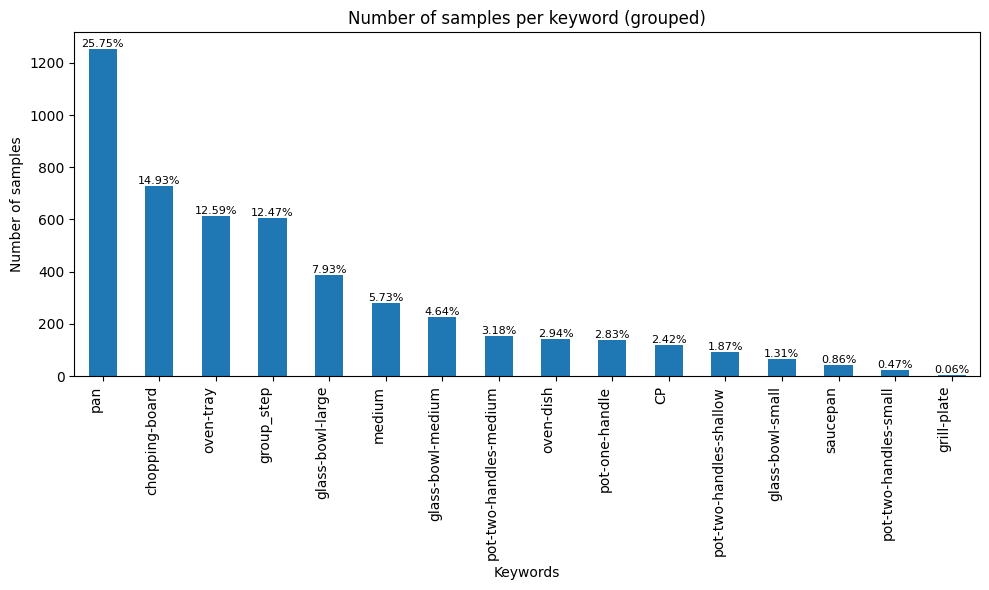

In [15]:
## FINAL COUNT

# Plot histogram to see distribution of samples per keyword
plt.figure(figsize=(10, 6))
ax = samples_per_keyword_grouped.plot(kind='bar')
plt.xlabel("Keywords")
plt.ylabel("Number of samples")
plt.title("Number of samples per keyword (grouped)")
plt.xticks(rotation=90, ha="right")

# Annotate each bar with the percentage value
total_samples = samples_per_keyword.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total_samples) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

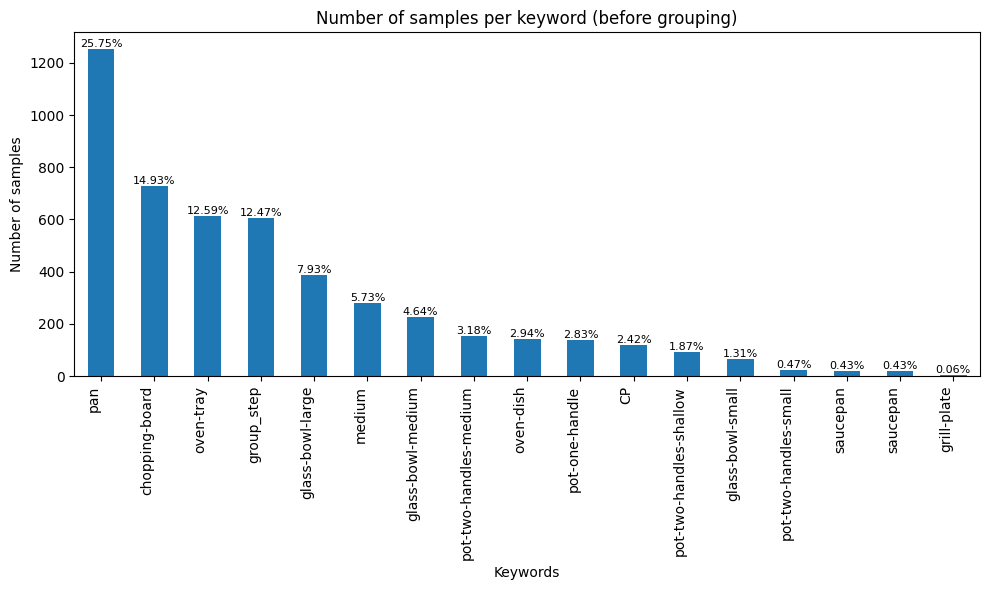

In [16]:
# Plot histogram to see distribution of samples per keyword (before grouping)
plt.figure(figsize=(10, 6))
ax = samples_per_keyword.plot(kind='bar')
plt.xlabel("Keywords")
plt.ylabel("Number of samples")
plt.title("Number of samples per keyword (before grouping)")
plt.xticks(rotation=90, ha="right")

# Annotate each bar with the percentage value
total_samples = samples_per_keyword.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total_samples) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()